## Woche 7: Datenanalyse-Beispiele: College- und Auto-Datensatz
Datenquellen: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R. New York: Springer-Verlag.

armin.baenziger@zhaw.ch

Letzte Anpassung: 6.9.2020

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%autosave 0
%matplotlib inline

Autosave disabled


### Datensatz College.csv
This exercise relates to the College data set, which can be found in
the file College.csv. It contains a number of variables for 777 different
universities and colleges in the US. The variables are
- `Private` : Public/private indicator
- `Apps` : Number of applications received
- `Accept` : Number of applicants accepted
- `Enroll` : Number of new students enrolled
- `Top10_Perc` : New students from top 10% of high school class
- `Top25_Perc` : New students from top 25% of high school class
- `F_Undergrad` : Number of full-time undergraduates
- `P_Undergrad` : Number of part-time undergraduates
- `Outstate` : Out-of-state tuition
- `Room_Board` : Room and board costs
- `Books` : Estimated book costs
- `Personal` : Estimated personal spending
- `PhD` : Percent of faculty with Ph.D.’s
- `Terminal` : Percent of faculty with terminal degree
- `SF_Ratio` : Student/faculty ratio
- `Alumni_Perc` : Percent of alumni who donate
- `Expend` : Instructional expenditure per student
- `Grad_Rate` : Graduation rate

**(A.1)** Daten ins DataFrame `College` importieren:

In [3]:
College = pd.read_csv('../../weitere_Daten/College.csv')

**(A.2)** Daten mit der `head`-Methode überblicken:

In [4]:
College.head()

,College,Private,Apps,Accept,Enroll,Top10_Perc,Top25_Perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_Ratio,Alumni_Perc,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**(A.3)** `College` als Index festlegen:

In [6]:
College.set_index('College', inplace=True)

In [8]:
College.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10_Perc     0
Top25_Perc     0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
SF_Ratio       0
Alumni_Perc    0
Expend         0
Grad_Rate      0
dtype: int64

In [11]:
College.notnull().sum()

Private        777
Apps           777
Accept         777
Enroll         777
Top10_Perc     777
Top25_Perc     777
F_Undergrad    777
P_Undergrad    777
Outstate       777
Room_Board     777
Books          777
Personal       777
PhD            777
Terminal       777
SF_Ratio       777
Alumni_Perc    777
Expend         777
Grad_Rate      777
dtype: int64

**(A.4)** Numerische Zusammenfassung:

In [12]:
College.describe()

,Apps,Accept,Enroll,Top10_Perc,Top25_Perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_Ratio,Alumni_Perc,Expend,Grad_Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**(A.5)** Histogramm von `Outstate`:

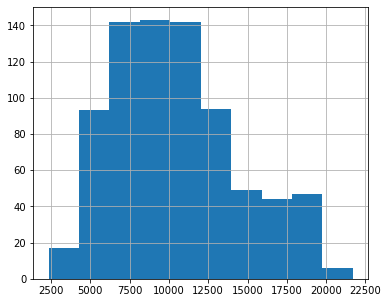

In [18]:
College.Outstate.hist(figsize=(6, 5));

**(A.6)** Streudiagramm von `Grad_Rate` versus `Outstate`:

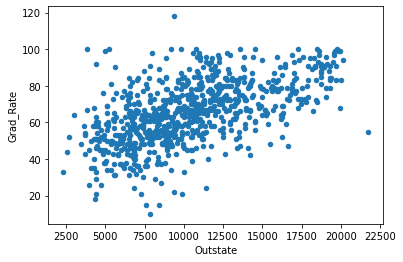

In [20]:
College.plot.scatter(x='Outstate', y='Grad_Rate');

In [23]:
College[College.Grad_Rate == College.Grad_Rate.max()]

,Private,Apps,Accept,Enroll,Top10_Perc,Top25_Perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_Ratio,Alumni_Perc,Expend,Grad_Rate
College,,,,,,,,,,,,,,,,,,
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [24]:
College.Grad_Rate.idxmax()

'Cazenovia College'

**(A.7)** Korrelation von `Grad_Rate` versus `Outstate`:

In [26]:
College.Grad_Rate.corr(College.Outstate).round(3)

0.571

**(A.8)** Streudiagramm von `SF_Ratio` versus `Outstate`:

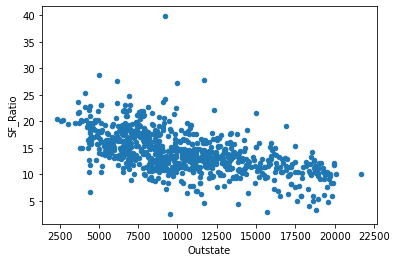

In [32]:
College.plot.scatter('Outstate', 'SF_Ratio');

**(A.9)** Welches College ist der Ausreisser (mit der hohen `SF_Ratio`)?

In [33]:
College.SF_Ratio.idxmax()

'Indiana Wesleyan University'

**(A.10)** Colleges mit `Outstate >= 20000`:

In [36]:
College[College.Outstate >= 20000]

,Private,Apps,Accept,Enroll,Top10_Perc,Top25_Perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_Ratio,Alumni_Perc,Expend,Grad_Rate
College,,,,,,,,,,,,,,,,,,
Bennington College,Yes,519,327,114,25,53,457,2,21700,4100,600,500,35,59,10.1,33,16364,55
Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94


**(A.11)** Boxplot von `Outstate` versus `Private`:

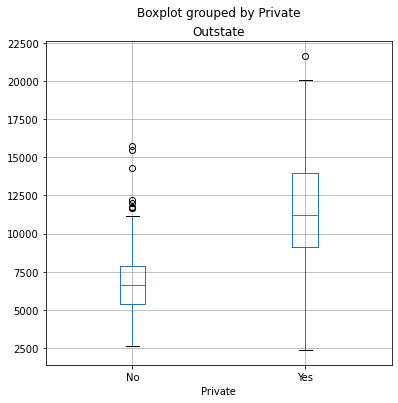

In [44]:
College.boxplot('Outstate', by='Private', figsize=(6,6));

**(A.12)** Neue Variable Elite: `True`, falls Top10_Perc > 50 (%), sonst `False`.

In [49]:
College['Elite'] = College.Top10_Perc > 50
College.Elite.value_counts()

False    699
True      78
Name: Elite, dtype: int64

**(A.13)** Boxplot von `Outstate` versus `Elite`:

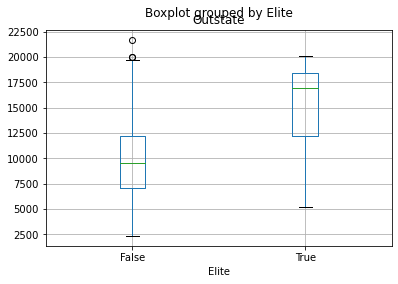

In [51]:
College.boxplot('Outstate', by='Elite');

**(A.14)** Variable `AcceptRate` erstellen (`Accept` relativ zu `Apps`): 

In [52]:
College['AcceptRate'] = College.Accept / College.Apps

**(A.15)** Histogramm von `AcceptRate`:

<AxesSubplot:>

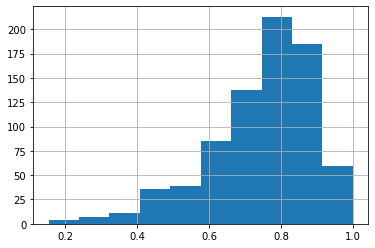

In [53]:
College.AcceptRate.hist()

**(A.16)** Colleges nach `AcceptRate` sortieren:

In [55]:
College.sort_values('AcceptRate', inplace=True)

**(A.17)** Die letzten zwei Variablen der zehn Colleges mit den tiefsten `AcceptRate` selektieren: 

In [60]:
College.iloc[:20, -2:]

,Elite,AcceptRate
College,,
Princeton University,True,0.154486
Harvard University,True,0.156149
Yale University,True,0.229145
Amherst College,True,0.230590
Brown University,True,0.257349
Georgetown University,True,0.259199
Dartmouth College,True,0.264702
Duke University,True,0.282326
Columbia University,True,0.285672


**(A.18)** Variable `University` erstellen, welche die Ausprägung `True` hat, falls im Namen "University" steht, ansonsten `False`: 

In [66]:
College['University'] = College.index.str.contains('University')

**(A.19)** Zusammenhang zwischen den Variablen `University` und `Apps` mit Boxplots darstellen:

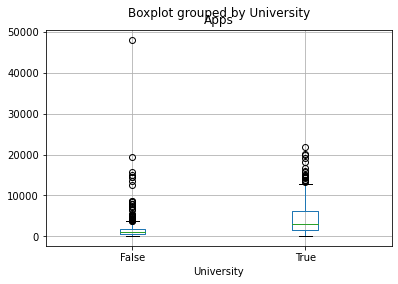

In [68]:
College.boxplot('Apps', by='University');

**(A.20)** Welches College sticht heraus?

In [69]:
College.Apps.idxmax()

'Rutgers at New Brunswick'

***

### Datensatz Auto.csv

**Description:**
Gas mileage, horsepower, and other information for 392 vehicles.

**Format:**
A data frame with 392 observations on the following 9 variables:
- `mpg`: miles per gallon
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement (cu. inches)
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight (lbs.)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year (modulo 100)
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name

**(B.1)** Daten ins DataFrame `Auto` importieren:

In [74]:
Auto = pd.read_csv('../../weitere_Daten/Auto.csv', sep=';')

**(B.2)** Daten mit der `head`-Methode überblicken:

In [75]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**(B.3)** `name` als Index festlegen:

In [77]:
Auto.set_index('name', inplace=True)

**(B.4)** Numerische Zusammenfassung:

In [78]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**(B.5)** In den USA wird die Treibstoffeffizienz von Fahrzeugen in Meilen pro Gallone gemessen (je *grösser* der Wert, desto effizienter). In Europa misst man sie in Liter pro `100 km` (je *kleiner* der Wert, desto effizienter). Erstellen Sie die Variable `lpro100km` aus `mpg`. (Hinweis: Eine Meile ist `1.60934 km` und eine Gallone ist `3.78541 l`.)

In [81]:
Auto['lpro100km'] = 100*3.78541 / (Auto.mpg*1.60934)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,lpro100km
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,13.067503
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,15.681004
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,13.067503
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,14.700941
ford torino,17.0,8,302.0,140,3449,10.5,70,1,13.836180


**(B.6)** Passendes Diagramm der Verteilung von `lpro100km`:

<AxesSubplot:>

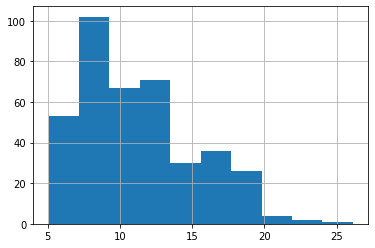

In [82]:
Auto.lpro100km.hist()

**(B.7)** Streudiagramm von Gewicht (`weight`) versus Beschleunigung (`acceleration`, Sekunden bis 60 mph):

<AxesSubplot:xlabel='weight', ylabel='acceleration'>

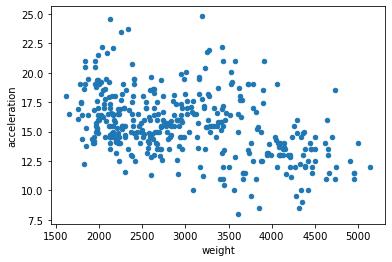

In [93]:
Auto.plot.scatter('weight', 'acceleration')

In [95]:
Auto.acceleration.idxmin()

"plymouth 'cuda 340"

**(B.8)** Streudiagramm-Matrix. Befund? Erklärung dafür, dass schwere Autos tendenziell besser beschleunigen?

**(B.9)** Umcodierung von `origin`: `1=American, 2=European, 3=Japanese`

In [86]:
Auto.origin.replace({1: 'American', 2: 'European', 3: 'Japanese'}, inplace=True)

**(B.10)** Zusammenhang Verbrauch (`lpro100km`) nach `origin`:

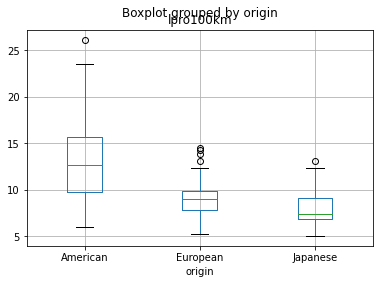

In [88]:
Auto.boxplot('lpro100km', by='origin');

**(B.11)** Entwicklung von `lpro100km` nach `year`:

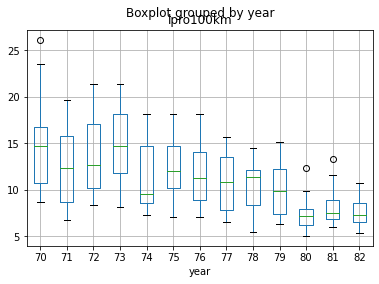

In [89]:
Auto.boxplot('lpro100km', by='year');

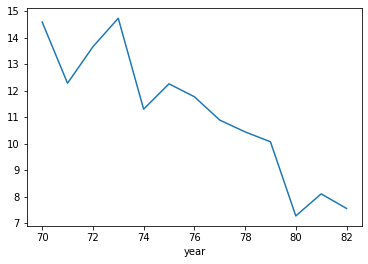

In [92]:
Auto.lpro100km.groupby(Auto.year).mean().plot();